In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sys
print(sys.version)
sys.path.append('../')

from models.powertrain.bounded_powertrain import Bounded_powertrain
from models.kinematic.ideal_diff_drive import Ideal_diff_drive
from models.kinematic.ICR_based import *
from models.kinematic.Perturbed_unicycle import *
from models.kinematic.enhanced_kinematic import *

3.10.6 (main, Nov 14 2022, 16:10:14) [GCC 11.3.0]


In [25]:
#import training dataset

dataset = pd.read_pickle('/home/dominic/repos/norlab_WMRD/data/marmotte/grand_salon_12_12_a/torch_dataset_all.pkl')

print(dataset)

cmd_left_str_list = []
cmd_right_str_list = []
for i in range(0, 40):
    str_cmd_left_i = 'cmd_left_' + str(i)
    str_cmd_right_i = 'cmd_right_' + str(i)
    cmd_left_str_list.append(str_cmd_left_i)
    cmd_right_str_list.append(str_cmd_right_i)
cmd_left_vels_array = dataset[cmd_left_str_list].to_numpy()
cmd_right_vels_array = dataset[cmd_right_str_list].to_numpy()

encoder_left_str_list = []
encoder_right_str_list = []
for i in range(0, 40):
    str_encoder_left_i = 'left_wheel_vel_' + str(i)
    str_encoder_right_i = 'right_wheel_vel_' + str(i)
    encoder_left_str_list.append(str_encoder_left_i)
    encoder_right_str_list.append(str_encoder_right_i)
encoder_left_vels_array = dataset[encoder_left_str_list].to_numpy()
encoder_right_vels_array = dataset[encoder_right_str_list].to_numpy()

     init_icp_x  init_icp_y  init_icp_z  init_icp_roll  init_icp_pitch  \
0      0.000000    0.000000    0.000000       0.000000        0.000000   
1      0.000921    0.001698    0.000673       0.000344        0.008378   
2      0.002518    0.002642    0.000315      -0.000111        0.009173   
3     -0.003530    0.008637   -0.000532       0.000139        0.008575   
4     -0.002363    0.002334   -0.000460      -0.000212        0.008567   
..          ...         ...         ...            ...             ...   
886   -2.277788    1.319567   -0.006760       0.020737        0.010034   
887   -2.112234    0.742279   -0.001907       0.019724        0.012799   
888   -1.933754    0.131296    0.007527       0.024937        0.010533   
889   -1.839247   -0.199064   -0.003292       0.019568       -0.004226   
890   -1.875623   -0.232927   -0.001289       0.008867       -0.000580   

     init_icp_yaw  calib_step  cmd_left_0  cmd_right_0  cmd_left_1  ...  \
0        0.000000         0.0       

In [26]:
# find biggest dynamic window

n_windows = len(dataset)
max_left_diff_window = 0
last_max_left_vel_diff = 0

for i in range(0, n_windows):
    left_vel_diff = np.abs(cmd_left_vels_array[i, 0] - cmd_left_vels_array[i, 39])
    if left_vel_diff > last_max_left_vel_diff:
        max_left_diff_window = i
        last_max_left_vel_diff = left_vel_diff
        
        
print(max_left_diff_window)

762


280
280


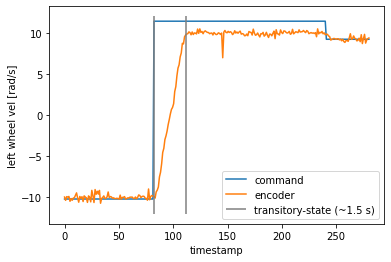

In [62]:
# plot left wheel vel

dt = 0.05
timestamps_per_horizon = 40
start_id = 760
end_id = 767
num_timestamps = int((end_id - start_id) * 40)
print(num_timestamps)
print(end_id * 40 - start_id * 40)

time_vector = np.linspace(0, num_timestamps, num_timestamps)

cmd_vel_left_flat = cmd_left_vels_array.flatten()
encoder_vel_left_flat = encoder_left_vels_array.flatten()

window_start = 2*timestamps_per_horizon+2
steady_state_limits = np.array([window_start, window_start + 30])

plt.plot(time_vector, cmd_vel_left_flat[start_id*40:end_id*40], label='command')
plt.plot(time_vector, encoder_vel_left_flat[start_id*40:end_id*40], label='encoder')
plt.vlines(steady_state_limits, -12, 12, color='C7', label='transitory-state (~1.5 s)')

plt.xlabel('timestamp')
plt.ylabel('left wheel vel [rad/s]')

plt.legend()

280
280


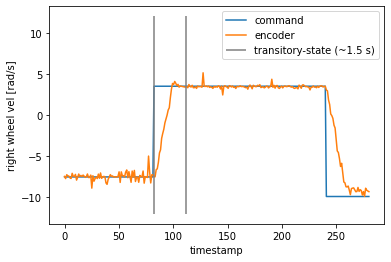

In [63]:
# plot right wheel vel

dt = 0.05
timestamps_per_horizon = 40
start_id = 760
end_id = 767
num_timestamps = int((end_id - start_id) * 40)
print(num_timestamps)
print(end_id * 40 - start_id * 40)

time_vector = np.linspace(0, num_timestamps, num_timestamps)

cmd_vel_right_flat = cmd_right_vels_array.flatten()
encoder_vel_right_flat = encoder_right_vels_array.flatten()

window_start = 2*timestamps_per_horizon+2
steady_state_limits = np.array([window_start, window_start + 30])

plt.plot(time_vector, cmd_vel_right_flat[start_id*40:end_id*40], label='command')
plt.plot(time_vector, encoder_vel_right_flat[start_id*40:end_id*40], label='encoder')
plt.vlines(steady_state_limits, -12, 12, color='C7', label='transitory-state (~1.5 s)')

plt.xlabel('timestamp')
plt.ylabel('right wheel vel [rad/s]')

plt.legend()